<a href="https://colab.research.google.com/github/singhhshipra/ML_LAB_/blob/main/1BM22CS341_Lab_10_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ 'income.csv' created successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

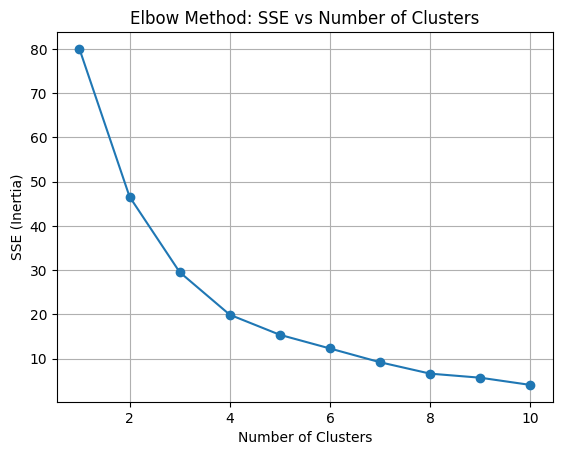

🔍 Adjusted Rand Index (proxy accuracy): 0.02


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import random

# Step 1: Create income.csv with dummy data
np.random.seed(42)
names = [f"Person_{i}" for i in range(1, 51)]
ages = np.random.randint(20, 60, 50)
incomes = np.random.randint(20000, 100000, 50)

df = pd.DataFrame({
    'Name': names,
    'Age': ages,
    'Income': incomes
})
df.to_csv('income.csv', index=False)
print("✅ 'income.csv' created successfully.")

# Uncomment these lines if you're using Google Colab and want to download the file
from google.colab import files
files.download('income.csv')

# Step 2: Load data (excluding 'Name')
data = pd.read_csv('income.csv')
X = data[['Age', 'Income']]

# Step 3: Train-test split (80% train, 20% test)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Step 4: Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Plot SSE vs number of clusters (Elbow method)
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    sse.append(kmeans.inertia_)

plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method: SSE vs Number of Clusters')
plt.grid(True)
plt.show()

# Step 6: Fit KMeans model with chosen k
k = 3  # Change this based on the elbow plot
model = KMeans(n_clusters=k, random_state=42)
model.fit(X_train_scaled)

# Step 7: Predict clusters
train_preds = model.predict(X_train_scaled)
test_preds = model.predict(X_test_scaled)

# Step 8: Evaluate with Adjusted Rand Index (simulated labels)
true_labels_train = [random.randint(0, k-1) for _ in range(len(train_preds))]
accuracy = adjusted_rand_score(true_labels_train, train_preds)
print("🔍 Adjusted Rand Index (proxy accuracy):", round(accuracy, 2))


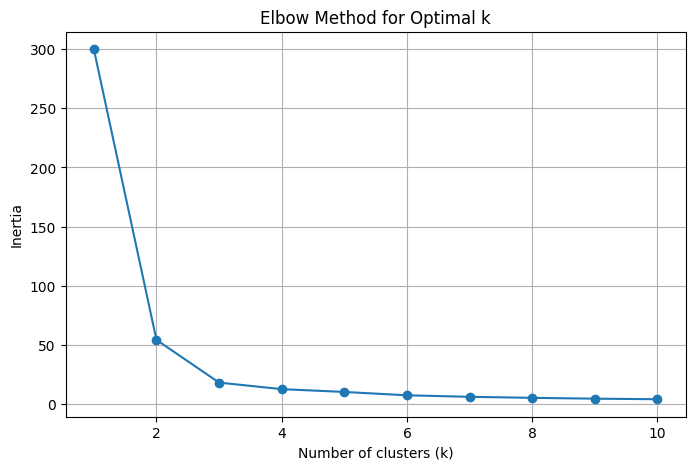

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Load the Iris dataset and select petal length and width
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
X = data[["petal length (cm)", "petal width (cm)"]]

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Elbow Method to find optimal k
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()